<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Credit_Scoring_based_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estrategias basadas en Modelos de Credit Scoring**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [6]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [13]:
import pickle

In [14]:
pip install feature_engine

In [15]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pkl','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [17]:
# Cargar el modelo
with open('final_model.pkl','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

In [18]:
X_test_t=fe_final.transform(X_test)

In [19]:
X_test_t.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,MEDIANA_AHORROS_ULT_6M,MESES_AHORROS_ULT_6M,LINEA_DE_TC,EDAD_T,DEUDA,DEUDA_TOTAL_SISTEMA,ATRASO_MAXIMO_ULT_12M
10379,-0.419546,0.344459,-0.171220,-0.403113,-0.390857,0.134467,0.033388,0.378316,-0.380749,-0.737956,0.037165,0.157925,0.182889,-0.057462
18074,0.151884,-0.229072,-0.171220,0.247396,-0.081927,0.134467,0.033388,-0.230653,-0.380749,-0.211847,0.045089,-0.331184,0.082136,-0.057462
1449,0.151884,0.395954,0.631614,0.039208,0.065255,0.134467,0.033388,0.498024,0.192524,0.399989,0.255996,0.052119,-0.083611,-0.057462
11241,0.151884,-0.229072,-0.171220,0.247396,-0.167256,0.134467,0.033388,0.378316,-0.380749,0.078626,-0.209728,0.009753,0.245556,-0.057462
17105,0.151884,0.344459,-0.171220,0.247396,0.084419,0.134467,0.033388,0.378316,0.696012,0.399989,0.411555,-0.529243,0.002258,0.508870


In [20]:
pred_test_gbc = modelo_final.predict_proba(X_test_t)

In [21]:
pred_test_gbc

array([[0.95302368, 0.04697632],
       [0.98407697, 0.01592303],
       [0.76448388, 0.23551612],
       ...,
       [0.90637396, 0.09362604],
       [0.97780327, 0.02219673],
       [0.89929239, 0.10070761]])

## **1. Tasas de Aceptación**

In [22]:
# Estadísticas de las probabilidades de incumplimiento
true_list = pd.DataFrame(y_test, columns = ['FLG_DEFAULT_12M']).rename(columns={'FLG_DEFAULT_12M':'true_loan_status'}, inplace=False)

In [23]:
true_list.shape

(9584, 1)

In [24]:
test_pred_df = pd.concat([true_list.reset_index(drop=True), pd.DataFrame(pred_test_gbc[:,1],columns=['prob_default'])], axis = 1)

In [25]:
test_pred_df

,true_loan_status,prob_default
0,0,0.046976
1,0,0.015923
2,1,0.235516
3,0,0.061980
4,0,0.204207
...,...,...
9579,0,0.024287
9580,0,0.056458
9581,0,0.093626
9582,0,0.022197


In [26]:
print(test_pred_df['prob_default'].describe())

count    9584.000000
mean        0.064018
std         0.064439
min         0.001197
25%         0.019554
50%         0.042627
75%         0.084607
max         0.581913
Name: prob_default, dtype: float64


In [27]:
# Umbral para una tasa de aceptación del 20 %
threshold_20 = np.quantile(test_pred_df['prob_default'], 0.20)

# Umbral de tasa de aceptación
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_20 else 0)

# Recuentos del estado del préstamo después del umbral
print(test_pred_df['pred_loan_status'].value_counts())

pred_loan_status
1    7667
0    1917
Name: count, dtype: int64


In [28]:
threshold_20

np.float64(0.01592231287542179)

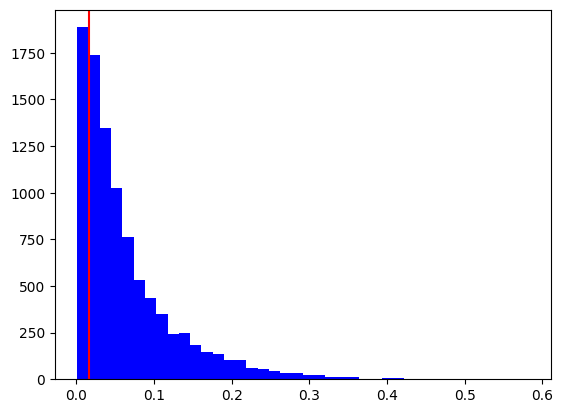

In [29]:
# Histograma de las probabilidades previstas de incumplimiento
plt.hist(pred_test_gbc[:,1], color = 'blue', bins = 40)

# Línea de referencia al gráfico para el umbral
plt.axvline(x = threshold_20, color = 'red')
plt.show()

In [30]:
# Subconjunto de solo préstamos aceptados
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Cálculo de la tasa de malos para la muestra de aceptados
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

0.011476264997391758


In [31]:
# Matriz de tazas de aceptación
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [32]:
# Matriz de umbrales
thresholds = []

In [33]:
# Matriz de bad rates
bad_rates = []

In [34]:
# Prestamos aceptados
accepted_loans = accepted_loans[0:0]

In [35]:
# Número de prestamos aceptados
num_accepted_loans = []

In [36]:
# Matrices de la tabla de estrategia con un bucle for
for rate in accept_rates:
    # Umbral para la tasa de aceptación
    thresh = np.quantile(test_pred_df['prob_default'], rate).round(3)
    # Agregación del valor del umbral a la lista de umbrales
    thresholds.append(np.quantile(test_pred_df['prob_default'], rate).round(3))
    # Reasignación del valor del estado del préstamo usando el umbral
    test_pred_df['pred_loan_status'] = \
        test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Conjunto de préstamos aceptados usando esta tasa de aceptación
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculo y asignación de la tasa baja usando la tasa de aceptación
    bad_rates.append(np.sum((accepted_loans['true_loan_status'])
             / accepted_loans['true_loan_status'].count()).round(3))
    # Numero de prestamos aceptados
    num_accepted_loans.append(len(test_pred_df[test_pred_df['prob_default']<np.quantile(test_pred_df['prob_default'], rate).round(3)]))

In [37]:
# Marco de datos de la tabla de estrategia comercial
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates), columns = ['Acceptance Rate','Threshold','Bad Rate'])
strat_df

,Acceptance Rate,Threshold,Bad Rate
0,1.00,0.582,0.063
1,0.95,0.200,0.054
2,0.90,0.150,0.049
3,0.85,0.121,0.045
4,0.80,0.101,0.041
5,0.75,0.085,0.038
6,0.70,0.072,0.033
7,0.65,0.063,0.031
8,0.60,0.055,0.028
9,0.55,0.049,0.025


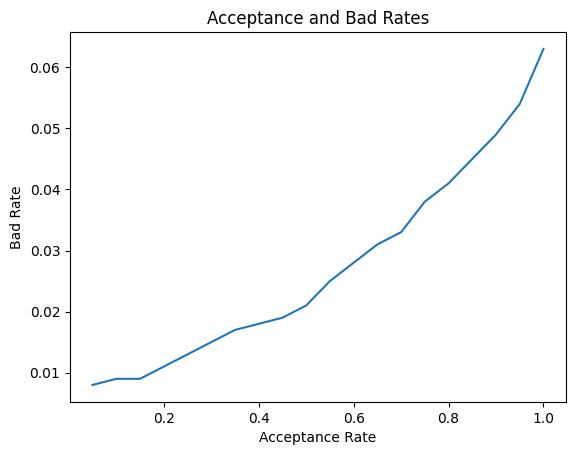

In [38]:
# Gráfico de la curva de aceptacion y tasa de malos
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.show()